# **Installing and Importing needed Libraries while setting up the data path**

In [1]:
import os
data_folder_path = r"C:\Users\Youssefch\Desktop\studies\prjIA\data"
os.chdir(data_folder_path)
current_directory = os.getcwd()
print("Current working directory:", current_directory)
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display, Javascript
from base64 import b64decode
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from zipfile import ZipFile
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
from keras import models, layers, optimizers, utils, losses
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras.models import save_model
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV library for image processing
from flask import Flask, request
from tensorflow.keras.callbacks import ModelCheckpoint
import imgcompare
import math
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from keras.layers import Activation
from keras.models import save_model
epochs=10

Current working directory: c:\Users\Youssefch\Desktop\studies\prjIA\data


# **Preparing the Train/Validation data**


In [2]:
train_dir = 'train'
val_dir = 'test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(232,232),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')


validation_generator = val_datagen.flow_from_directory(
        val_dir,
        target_size=(232,232),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')




Found 4181 images belonging to 3 classes.
Found 1047 images belonging to 3 classes.


# **Data Augmentation**


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
     fill_mode = 'nearest',
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **Custom Convolutional Neural Network Construction and compile**


In [4]:
Custom_Model = Sequential()

# Define the CNN model
Custom_Model = Sequential()

# Step 1 - Convolution Layer
Custom_Model.add(Conv2D(32, (3, 3), input_shape=(232, 232, 1), activation='relu'))

# Step 2 - Pooling Layer
Custom_Model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a second convolutional layer
Custom_Model.add(Conv2D(64, (3, 3), activation='relu'))
Custom_Model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a third convolutional layer
Custom_Model.add(Conv2D(128, (3, 3), activation='relu'))
Custom_Model.add(MaxPooling2D(pool_size=(2, 2)))

# Step 3 - Flattening
Custom_Model.add(Flatten())

# Step 4 - Full Connection
Custom_Model.add(Dense(units=128, activation='relu'))
Custom_Model.add(Dense(units=3, activation='softmax'))  # 3 output units for 3 classes

Custom_Model.summary()

# Compile the model
Custom_Model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


# Configure Model Checkpoint
fle_s='model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 230, 230, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 115, 115, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 113, 113, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 128)      

# **Training the Model**

In [6]:
callback_list=[checkpointer]
print(len(train_generator))
# Train the model
history = Custom_Model.fit(
    train_generator,
    steps_per_epoch=None
    ,epochs=epochs,shuffle=True,callbacks=[callback_list],
    validation_data=validation_generator,
    validation_steps=None
)

Custom_Model.save('model.h5')

66
Epoch 1/10
66/66 [==============================] - ETA: 0s - loss: 0.3123 - accuracy: 0.8914
Epoch 1: loss improved from inf to 0.31230, saving model to model.h5


c:\Users\Youssefch\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 116s 2s/step - loss: 0.3123 - accuracy: 0.8914 - val_loss: 0.1996 - val_accuracy: 0.9236
Epoch 2/10
66/66 [==============================] - ETA: 0s - loss: 0.1713 - accuracy: 0.9378
Epoch 2: loss improved from 0.31230 to 0.17132, saving model to model.h5
66/66 [==============================] - 109s 2s/step - loss: 0.1713 - accuracy: 0.9378 - val_loss: 0.1863 - val_accuracy: 0.9331
Epoch 3/10
66/66 [==============================] - ETA: 0s - loss: 0.1048 - accuracy: 0.9658
Epoch 3: loss improved from 0.17132 to 0.10476, saving model to model.h5
66/66 [==============================] - 114s 2s/step - loss: 0.1048 - accuracy: 0.9658 - val_loss: 0.1489 - val_accuracy: 0.9417
Epoch 4/10
66/66 [==============================] - ETA: 0s - loss: 0.0671 - accuracy: 0.9754
Epoch 4: loss improved from 0.10476 to 0.06714, saving model to model.h5
66/66 [==============================] - 116s 2s/step - loss: 0.0671 - accuracy: 0.9754 - val_loss: 0.1347 - 

# **Model Evaluation**

In [7]:

test_generator = val_datagen.flow_from_directory(
    'test',
    target_size=(232, 232),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)


y_pred = Custom_Model.predict(test_generator)

y_true = test_generator.classes

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 1047 images belonging to 3 classes.


17/17 [==============================] - 6s 317ms/step
Test Accuracy: 95.89%


# **Training VS Validation Accuracy**

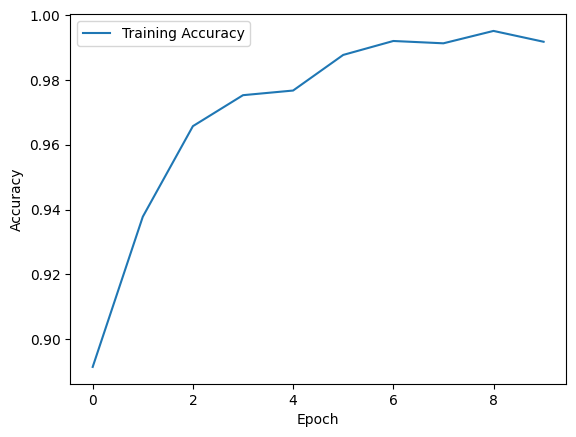

In [8]:

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

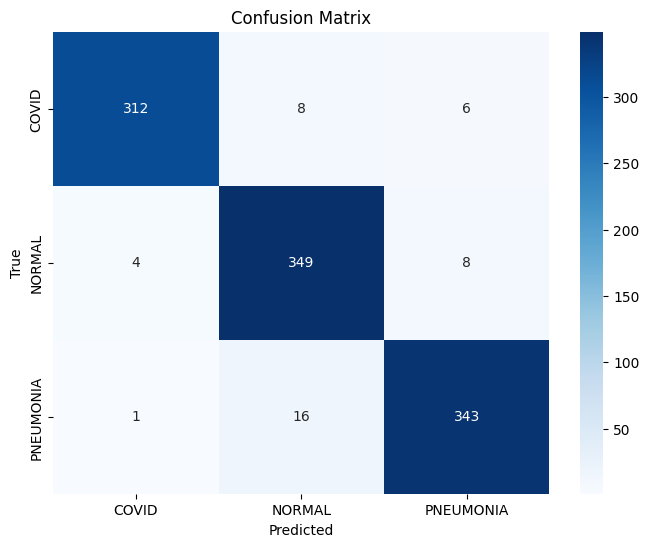

In [9]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [10]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       COVID       0.98      0.96      0.97       326
      NORMAL       0.94      0.97      0.95       361
   PNEUMONIA       0.96      0.95      0.96       360

    accuracy                           0.96      1047
   macro avg       0.96      0.96      0.96      1047
weighted avg       0.96      0.96      0.96      1047



# **ROC Curves**

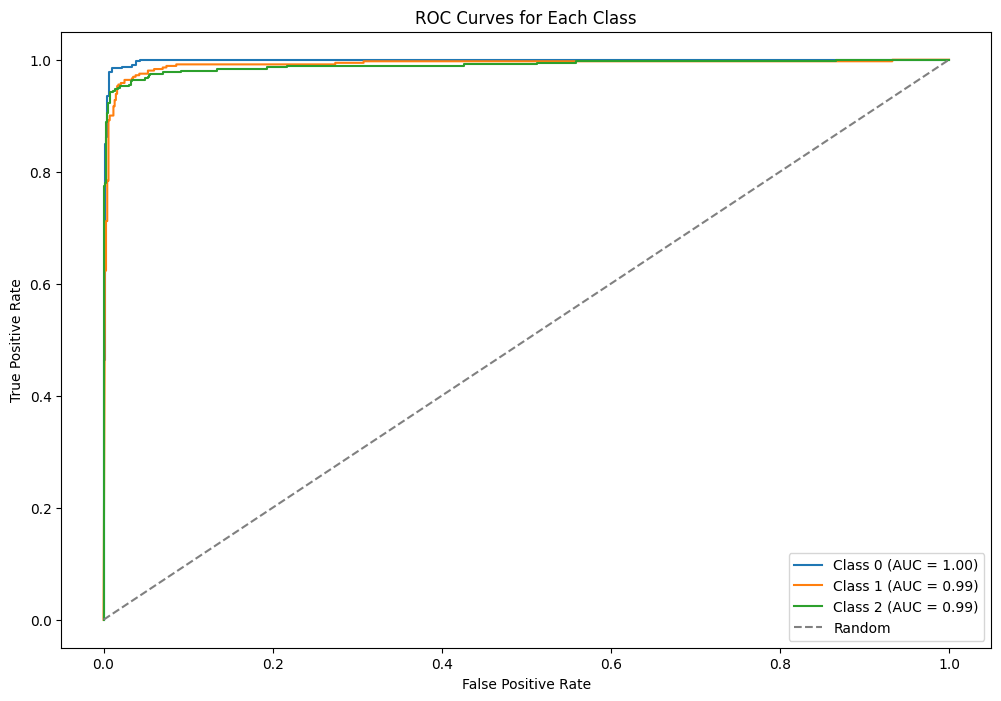

In [11]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **Dense Convolutional Neural Network Construction and compile**


In [30]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, BatchNormalization, Activation, Input, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Hyperparameters
input_shape = (232, 232, 1)
num_classes = 3

def dense_block(x, blocks, name):
    for i in range(blocks):
        x = conv_block(x, 32, name=name + '_block' + str(i + 1))
    return x

def conv_block(x, growth_rate, name):
    bn_axis = 3
    x1 = BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_0_bn')(x)
    x1 = Activation('relu', name=name + '_0_relu')(x1)
    x1 = Conv2D(4 * growth_rate, 1, use_bias=False, name=name + '_1_conv')(x1)
    x1 = BatchNormalization(axis=bn_axis, epsilon=1.001e-5, name=name + '_1_bn')(x1)
    x1 = Activation('relu', name=name + '_1_relu')(x1)
    x1 = Conv2D(growth_rate, 3, padding='same', use_bias=False, name=name + '_2_conv')(x1)
    x = Concatenate(axis=bn_axis, name=name + '_concat')([x, x1])  # Fix the concatenation
    return x

# Model
input_layer = Input(shape=input_shape)
x = Conv2D(32, (3, 3), activation='relu')(input_layer)
x = MaxPooling2D((2, 2))(x)

# Adding DenseNet block
x = dense_block(x, 6, 'dense_block_1')
x = AveragePooling2D(3)(x)

x = Flatten()(x)
output_layer = Dense(num_classes, activation='softmax')(x)

Dense_Model = Model(inputs=input_layer, outputs=output_layer)

Dense_Model.summary()

# Compile the model
Dense_Model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Configure Model Checkpoint
file_s = './Models/Dense_Model.h5'
checkpointer = ModelCheckpoint(file_s, monitor='loss', verbose=1, save_best_only=True, save_weights_only=False, save_freq='epoch')


Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 232, 232, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_28 (Conv2D)             (None, 230, 230, 32  320         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_15 (MaxPooling2D  (None, 115, 115, 32  0          ['conv2d_28[0][0]']              
 )                              )                                                           

# **Training the Model**

In [31]:
callback_list=[checkpointer]


historyDense = Dense_Model.fit(
        train_generator,
    steps_per_epoch=len(train_generator)//8,
    batch_size=128,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)//64,
epochs=epochs,
    shuffle=True,
    callbacks=[callback_list])


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 8.0608 - accuracy: 0.6797 
Epoch 1: loss improved from inf to 8.06080, saving model to ./Models\Dense_Model.h5
8/8 [==============================] - 237s 28s/step - loss: 8.0608 - accuracy: 0.6797
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 3.2472 - accuracy: 0.8477 
Epoch 2: loss improved from 8.06080 to 3.24722, saving model to ./Models\Dense_Model.h5
8/8 [==============================] - 236s 30s/step - loss: 3.2472 - accuracy: 0.8477
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 2.0758 - accuracy: 0.8848 
Epoch 3: loss improved from 3.24722 to 2.07583, saving model to ./Models\Dense_Model.h5
8/8 [==============================] - 226s 28s/step - loss: 2.0758 - accuracy: 0.8848
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 1.3189 - accuracy: 0.9180 
Epoch 4: loss improved from 2.07583 to 1.31889, saving model to ./Models\Dense_Model.h5
8/8 [==============

# **Model Evaluation**

In [32]:

test_generator = val_datagen.flow_from_directory(
    'test',
    target_size=(232, 232),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = Dense_Model.predict(test_generator)

y_true = test_generator.classes

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


Found 1047 images belonging to 3 classes.
17/17 [==============================] - 51s 3s/step
Test Accuracy: 55.59%


# **Training VS Validation Accuracy**

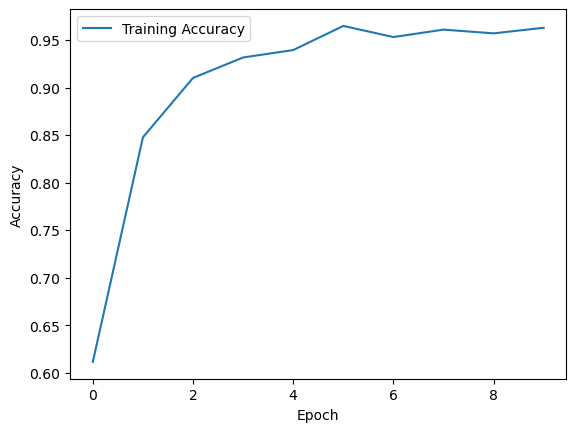

In [27]:

plt.plot(historyDense.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

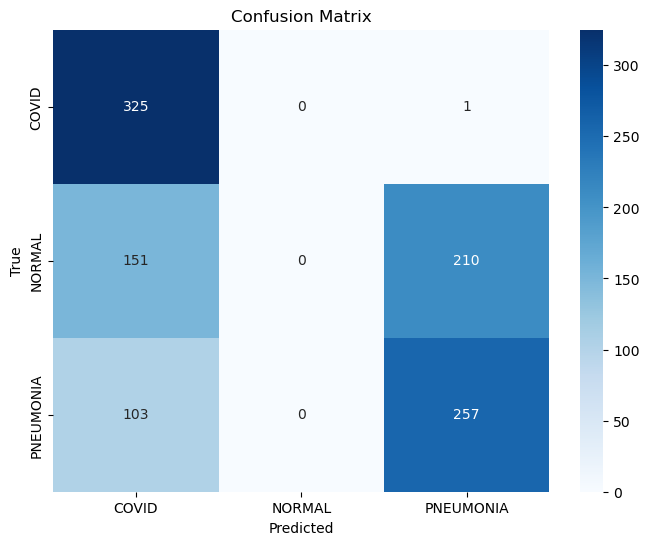

In [33]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [96]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

Classification Report:
               precision    recall  f1-score   support

       COVID       0.70      1.00      0.82       326
      NORMAL       0.00      0.00      0.00       361
   PNEUMONIA       0.52      0.84      0.64       360

    accuracy                           0.60      1047
   macro avg       0.41      0.61      0.49      1047
weighted avg       0.40      0.60      0.48      1047



C:\Users\kalil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\kalil\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **ROC Curves**

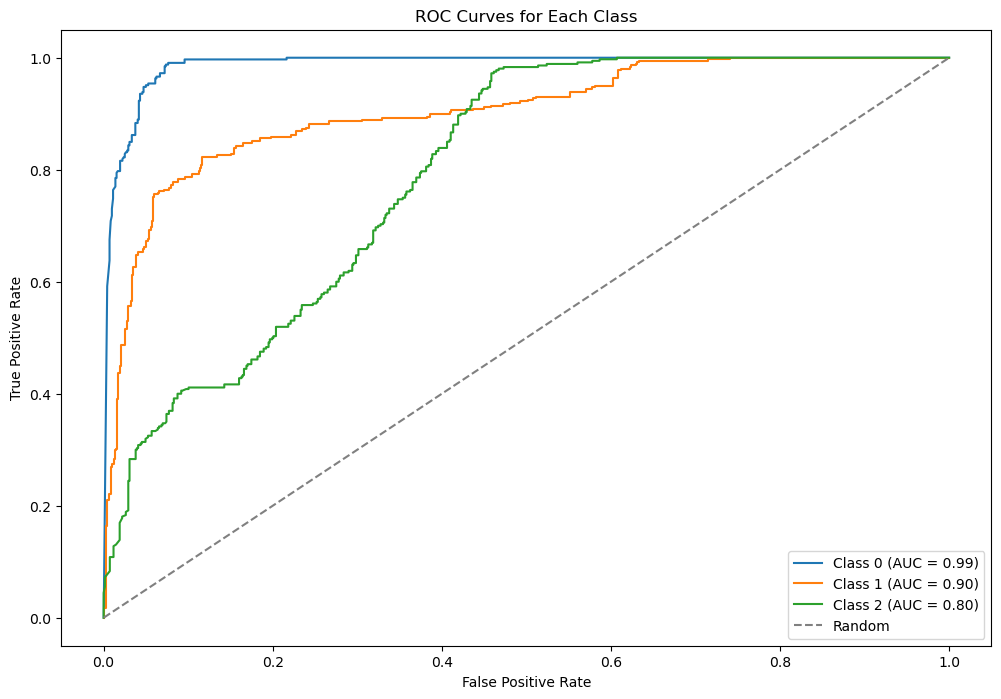

In [99]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **GoogleNet Convolutional Neural Network Construction and compile**


In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint

# Build the model
Googlenet_model = Sequential()

# Convolutional Block 1
Googlenet_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(232, 232, 1)))
Googlenet_model.add(BatchNormalization())
Googlenet_model.add(Activation('relu'))
Googlenet_model.add(Conv2D(32, (3, 3), padding='same'))
Googlenet_model.add(BatchNormalization())
Googlenet_model.add(Activation('relu'))
Googlenet_model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 2
Googlenet_model.add(Conv2D(64, (3, 3), padding='same'))
Googlenet_model.add(BatchNormalization())
Googlenet_model.add(Activation('relu'))
Googlenet_model.add(Conv2D(64, (3, 3), padding='same'))
Googlenet_model.add(BatchNormalization())
Googlenet_model.add(Activation('relu'))
Googlenet_model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Block 3
Googlenet_model.add(Conv2D(128, (3, 3), padding='same'))
Googlenet_model.add(BatchNormalization())
Googlenet_model.add(Activation('relu'))
Googlenet_model.add(Conv2D(128, (3, 3), padding='same'))
Googlenet_model.add(BatchNormalization())
Googlenet_model.add(Activation('relu'))
Googlenet_model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layers
Googlenet_model.add(Flatten())
Googlenet_model.add(Dense(512))
Googlenet_model.add(BatchNormalization())
Googlenet_model.add(Activation('relu'))
Googlenet_model.add(Dropout(0.3))  # Adjusted dropout rate
Googlenet_model.add(Dense(3, activation='softmax'))
Googlenet_model.summary()

# Compile the model
Googlenet_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Configure Model Checkpoint
fle_s='./Models/Googlenet_Model.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='loss',verbose=1,save_best_only=True,
                               save_weights_only=False, mode='auto',save_freq='epoch')


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 232, 232, 32)      320       
                                                                 
 batch_normalization_22 (Bat  (None, 232, 232, 32)     128       
 chNormalization)                                                
                                                                 
 activation_21 (Activation)  (None, 232, 232, 32)      0         
                                                                 
 conv2d_20 (Conv2D)          (None, 232, 232, 32)      9248      
                                                                 
 batch_normalization_23 (Bat  (None, 232, 232, 32)     128       
 chNormalization)                                                
                                                                 
 activation_22 (Activation)  (None, 232, 232, 32)     

# **Training the Model**

In [18]:
callback_list=[checkpointer]


historyGooglenet = Googlenet_model.fit(
        train_generator,
    steps_per_epoch=len(train_generator)//8,
    batch_size=128,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)//64,
epochs=epochs,
    shuffle=True,
    callbacks=[callback_list])


Epoch 1/10
8/8 [==============================] - ETA: 0s - loss: 0.6948 - accuracy: 0.8398
Epoch 1: loss improved from inf to 0.69484, saving model to ./Models\Googlenet_Model.h5
8/8 [==============================] - 57s 7s/step - loss: 0.6948 - accuracy: 0.8398
Epoch 2/10
8/8 [==============================] - ETA: 0s - loss: 0.3625 - accuracy: 0.8926
Epoch 2: loss improved from 0.69484 to 0.36250, saving model to ./Models\Googlenet_Model.h5
8/8 [==============================] - 54s 7s/step - loss: 0.3625 - accuracy: 0.8926
Epoch 3/10
8/8 [==============================] - ETA: 0s - loss: 0.2160 - accuracy: 0.9219
Epoch 3: loss improved from 0.36250 to 0.21597, saving model to ./Models\Googlenet_Model.h5
8/8 [==============================] - 51s 6s/step - loss: 0.2160 - accuracy: 0.9219
Epoch 4/10
8/8 [==============================] - ETA: 0s - loss: 0.1158 - accuracy: 0.9648
Epoch 4: loss improved from 0.21597 to 0.11578, saving model to ./Models\Googlenet_Model.h5
8/8 [========

# **Model Evaluation**

In [21]:
test_generator = val_datagen.flow_from_directory(
    'test',
    target_size=(232, 232),
    batch_size=64,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=False
)

y_pred = Googlenet_model.predict(test_generator)

y_true = test_generator.classes

y_pred_classes = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


2/2 [==============================] - 1s 590ms/step
Predicted: 0, True: 0
Predicted: 0, True: 1
Predicted: 0, True: 2
Predicted: 0, True: 2
Predicted: 0, True: 1
Predicted: 0, True: 2
Predicted: 0, True: 1
Predicted: 0, True: 0
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 2
Predicted: 0, True: 1
Predicted: 0, True: 0
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 0
Predicted: 0, True: 2
Predicted: 0, True: 2
Predicted: 0, True: 1
Predicted: 0, True: 2
Predicted: 0, True: 2
Predicted: 0, True: 0
Predicted: 0, True: 2
Predicted: 0, True: 2
Predicted: 0, True: 2
Predicted: 0, True: 2
Predicted: 0, True: 0
Predicted: 0, True: 1
Predicted: 0, True: 2
Predicted: 0, True: 0
Predicted: 0, True: 2
Predicted: 0, True: 1
Predicted: 0, True: 1
Predicted: 0, True: 0
Predicted: 0, True: 0
Predicted: 0, True: 2
Predicted: 0, True: 1
Predicted: 0, True: 0
Predicted: 0, True: 0
Predicted: 0, True: 1
Predicted: 0, True: 2
Predicted: 0, True: 0
P

KeyboardInterrupt: 

# **Training VS Validation Accuracy**

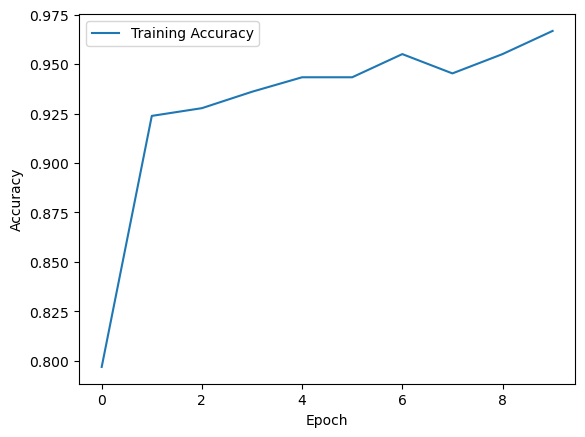

In [12]:

plt.plot(historyGooglenet.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# **Confusion Matrix**

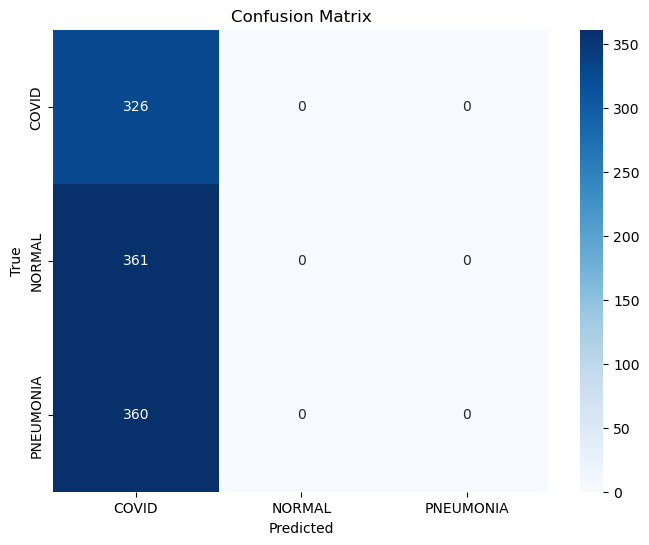

In [20]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(),
            yticklabels=train_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Classification Report**

In [4]:
class_report = classification_report(y_true, y_pred_classes, target_names=train_generator.class_indices.keys())
print('Classification Report:\n', class_report)

NameError: name 'y_true' is not defined

# **ROC Curves**

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(len(train_generator.class_indices)):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Each Class')
plt.legend()
plt.show()

# **----------------------------------------------------------------------------------------------**

# **----------------------------------------------------------------------------------------------**

# **Create Endpoints For Live CAM**

In [11]:

def predict_Sickness(model_path, img_path, confidence_threshold=0.5):
    # Load the saved model
    if not os.path.isfile(model_path):
        print(f"Error: Model file '{model_path}' not found.")
        return None

    loaded_model = load_model(model_path)

    # Load and preprocess the input image
    if not os.path.isfile(img_path):
        print(f"Error: Image file '{img_path}' not found.")
        return None

    input_size = 232  # Adjust based on your model's input size

    # Load the image in color (RGB)
    img_color = cv2.imread(img_path)
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
    # Resize the image to the model's input size
    img_gray = cv2.resize(img_gray, (input_size, input_size))
    # Expand dimensions to match the expected input shape
    img_array = np.expand_dims(img_gray, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # Normalize pixel values

    # Make predictions
    predictions = loaded_model.predict(img_array)

    # Interpret the predictions
    state_labels = ['COVID', 'NORMAL', 'PNEUMONIA']
    predicted_state_index = np.argmax(predictions)
    predicted_state = state_labels[predicted_state_index]
    confidence=predictions[0][predicted_state_index]
    
    # Check if the prediction confidence is above the threshold
    if confidence >= confidence_threshold:
        print(f"Predicted Patient State: {predicted_state} with confidence: {confidence:.2%}")
    else:
        print(f"Prediction confidence below threshold ({confidence_threshold:.2%}). Prediction result may not be reliable.")

    return predicted_state,confidence






# Create a Flask application instance
app = Flask(__name__)



#path of the image that will be saved and entred as input to the model to detect the emotion
imagePath=r"C:\Users\kalil\OneDrive\Bureau\MiniProjetIA\datasets\train\PNEUMONIA\PNEUMONIA_95.png"



@app.route('/Sickness/Custom', methods=['GET'])
def faceCustom():
    predicted_state,confidence = predict_Sickness(r"C:\Users\kalil\OneDrive\Bureau\MiniProjetIA\datasets\Models\Custom_Model.h5",imagePath,0.8)
    if(confidence>0.6):
        return f"Predicted Patient State: {predicted_state} with confidence: {confidence:.2%}"
    else:
        return "Not Sure!"




# Run the application if the script is executed directly
if __name__ == '__main__':
    app.run(port=5000)






 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


1/1 [==============================] - 0s 68ms/step


127.0.0.1 - - [26/Nov/2023 11:05:34] "GET /Sickness/Custom HTTP/1.1" 200 -


Predicted Patient State: PNEUMONIA with confidence: 98.98%
